# analyse de dataset : Diabetes_Health_Indicators_Dataset pour predire le diabete pour les personne

<img src="https://ma3loma.me/wp-content/uploads/2020/12/%D9%85%D8%A7-%D9%87%D9%8A-%D8%A3%D9%86%D9%88%D8%A7%D8%B9-%D9%85%D8%B1%D8%B6-%D8%A7%D9%84%D8%B3%D9%83%D8%B1%D9%8A%D8%9F.jpg" width="600" style="display:block; margin:auto;">


#  📝 Introduction


Le diabète est une maladie chronique qui affecte la régulation du glucose dans le sang. Il peut entraîner des complications graves, telles que les maladies cardiovasculaires, l'insuffisance rénale et des atteintes nerveuses. Détecter le diabète à un stade précoce est donc essentiel pour améliorer la qualité de vie des patients et réduire les risques de complications.
Aujourd’hui, grâce aux avancées en intelligence artificielle et en analyse de données médicales, il est possible de prédire la probabilité qu'un patient développe un diabète en fonction de ses antécédents médicaux et de certaines mesures physiologiques. 
Ce projet vise à développer un tableau de bord interactif permettant aux utilisateurs d’entrer leurs données de santé (âge, sexe, antécédents médicaux, IMC, taux de glucose, etc.) afin d’obtenir une prédiction automatique sur leur risque de diabète. L’objectif est d’offrir un outil rapide, intuitif et fiable pour assister les professionnels de santé et sensibiliser les individus à leur état de santé.



# 🎯 Problématique

 Avec l’augmentation du nombre de cas de diabète dans le monde, il est crucial de développer des outils accessibles et précis pour détecter cette maladie de manière précoce. Cependant, plusieurs défis se posent :

 🔹 **Quels sont les facteurs de risque les plus influents pour prédire le diabète ?**  


🔹 **Comment développer un modèle de machine learning fiable et interprétable pour évaluer le risque de diabète d’un patient ?**  


 🔹 **Comment concevoir une interface utilisateur intuitive permettant aux patients et aux professionnels de santé d’interagir facilement avec le modèle de prédiction ?**  


 🔹 **Quelle est la précision du modèle en fonction des différentes catégories de patients (âge, sexe, antécédents médicaux) ?**  


 🔹 **Comment éviter les biais dans la prédiction et garantir une évaluation équitable pour tous les utilisateurs ?**  


# Plan d'Analyse 🗺️


#### 💠 1. Importer les bibliothèques nécessaires
#### 💠 2. Chargement des données
#### 💠 3. Exploration des données
#### 💠 4. Statistiques descriptives des variables
#### 🔸 4.1 Répartition des types de variables
#### 💠 5. Vérification et traitement des valeurs manquantes et doublons
#### 💠 6. Visualisation des colonnes et déterminer les valeurs aberrantes
#### 💠 7. Destribution des variable target
#### 💠 8. Encodage
#### 💠 9. Standarisation des colonnes
#### 💠 10. Relation entre le variable target et les autre variables
#### 💠 11. Logistic regression
#### 💠 12. Visualise the model performence
#### 💠 13. Sauvgarder le model 



## 1. Importer les bibliothèques nécessaires

In [1]:
#importer les modules neccecaires
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder

## 2. Chargement des données


In [2]:
#lire le dataset
df = pd.read_csv('diabetes_prediction_dataset.csv')
data=df.copy()

## 3. Exploration des données


In [9]:
print()
print('              ############################## le nom des colonnes ##############################')
print()

cols = data.columns
colonnes = ''
for col in cols:
    if col == 'diabetes':
        colonnes = colonnes + col + '. '
        break
    else:
        colonnes = colonnes + col + ' , '
    

print(f'les colonnes de notre dataset sont : \n {colonnes}')


              ############################## le nom des colonnes ##############################

les colonnes de notre dataset sont : 
 gender , age , hypertension , heart_disease , smoking_history , bmi , HbA1c_level , blood_glucose_level , diabetes. 


In [10]:
print()
print('              ############################## HEAD ##############################')
print()
data.head(10)


              ############################## HEAD ##############################



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [11]:
print()
print('              ############################## TAIL ##############################')
print()
data.tail(10)


              ############################## TAIL ##############################



,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0
99991,Male,22.0,0,0,current,29.65,6.0,80,0
99992,Female,26.0,0,0,never,34.34,6.5,160,0
99993,Female,40.0,0,0,never,40.69,3.5,155,0
99994,Female,36.0,0,0,No Info,24.60,4.8,145,0
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [12]:
print()
print('              ############################## data shape ##############################')
print()
print(f'\t \t\t the data contain {data.shape[1]} colonnes et {data.shape[0]} lines')



              ############################## data shape ##############################

	 		 the data contain 9 colonnes et 100000 lines


## 4. Statistiques descriptives des variables


In [13]:
print()
print('              ############################## description de data ##############################')
print()
data.describe()


              ############################## description de data ##############################



,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [14]:
#determination des colonnes numeric et colonnes object 
print()
print('              ############################## les types des colonnes ##############################')
print()

numeric_cols = 'age	hypertension  heart_disease	 bmi  HbA1c_level  blood_glucose_level et diabetes'
cat_cols = 'gender smoking_history '

print('   -------------------------')
print('Les colonnes numerics : ')
print(numeric_cols)
print()
print('   -------------------------')
print('Les colonnes nom numerics : ')
print(cat_cols)
print()


              ############################## les types des colonnes ##############################

   -------------------------
Les colonnes numerics : 
age	hypertension  heart_disease	 bmi  HbA1c_level  blood_glucose_level et diabetes

   -------------------------
Les colonnes nom numerics : 
gender smoking_history 



### 4.1 Répartition des types de variables


              ############################## les types des valeurs ##############################

le data contient les types suivant 
 int64      4
float64    3
object     2
Name: count, dtype: int64

              ############################## visualisation des types de valeurs ##############################



<Axes: ylabel='count'>

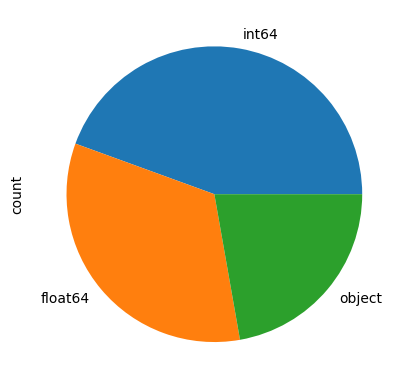

In [15]:
print()
print('              ############################## les types des valeurs ##############################')
print()
#data.dtypes.value_counts().plot.pie()
print(f'le data contient les types suivant \n {data.dtypes.value_counts()}')

print()
print('              ############################## visualisation des types de valeurs ##############################')
print()

data.dtypes.value_counts().plot.pie()

##  5. Vérification et traitement des valeurs manquantes et doublons

In [16]:
# Check for missing values in the DataFrame
print()
print('              ############################## dataset avant le nettoyage ##############################')
print()

data.isna().sum()


              ############################## dataset avant le nettoyage ##############################



gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

<Axes: >

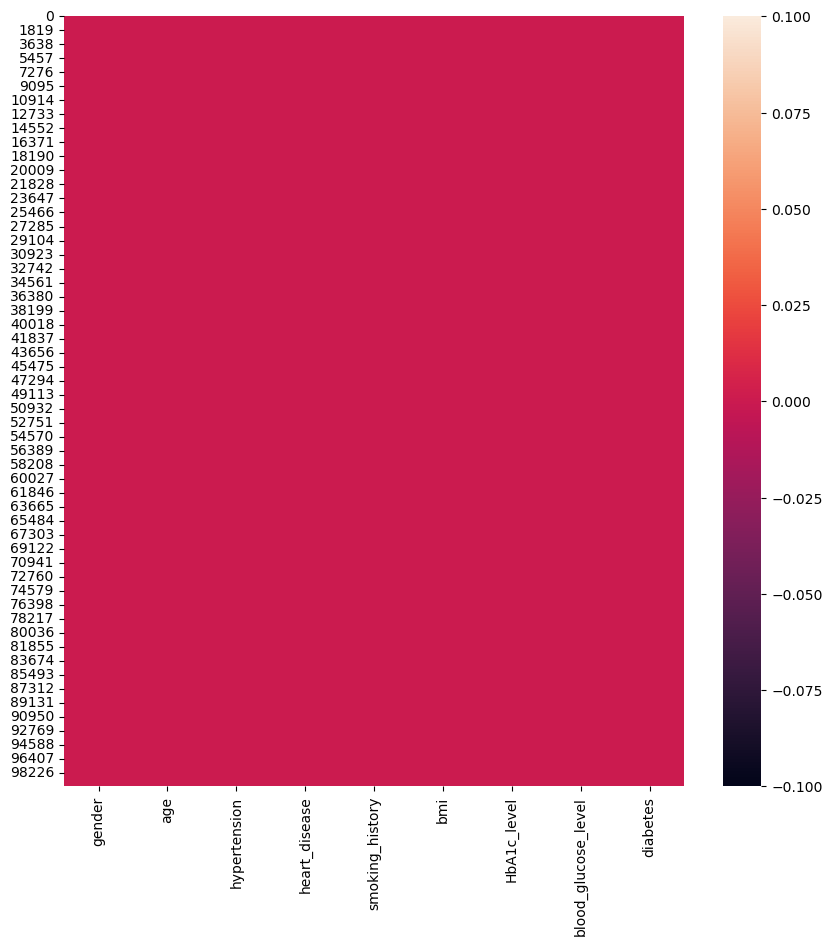

In [17]:
plt.figure(figsize=(10, 10)) 
# Créer une carte heatmap pour visualiser les valeurs manquantes
sns.heatmap(data.isna(), cbar=True) 

In [3]:
data = data.dropna()

In [19]:
# Check for missing values in the DataFrame
print()
print('              ############################## dataset apres la supression de valeur null ##############################')
print()

data.isna().sum()


              ############################## dataset apres la supression de valeur null ##############################



gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [20]:
#supression du duplicate 
print()
print('              ############################## dataset avant la suppression du duplicate ##############################')
print()

print(f'les colonnes : {data.shape[1]}')

print(f'les lines : {data.shape[0]}')
print()


              ############################## dataset avant la suppression du duplicate ##############################

les colonnes : 9
les lines : 100000



In [4]:
print()
print('              ############################## dataset apres la suppression du duplicate ##############################')
print()

data = data.drop_duplicates()
print(f'les colonnes : {data.shape[1]}')

print(f'les lines : {data.shape[0]}')
print()


              ############################## dataset apres la suppression du duplicate ##############################

les colonnes : 9
les lines : 96146



## 6.Visualisation des colonnes et déterminer les valeurs aberrantes

###       gender




              ############################## visualisation de varible gender ##############################



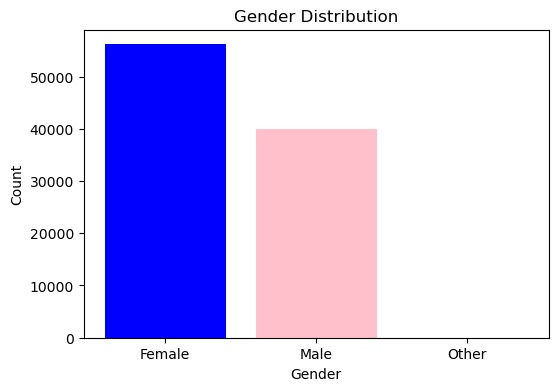

                                  -------------------------
le cont des valeur : 
gender
Female    56161
Male      39967
Other        18
Name: count, dtype: int64


In [22]:
#gender
# Count occurrences of each gender

print()
print('              ############################## visualisation de varible gender ##############################')
print()

gender_counts = data['gender'].value_counts()
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

print('                                  -------------------------')
print('le cont des valeur : ')
print(gender_counts)

In [5]:
#supression des outliers
data = data[data['gender'].isin(['Male','Female'])]



              ############################## visualisation de varible gender apres la suppression des outliers ##############################



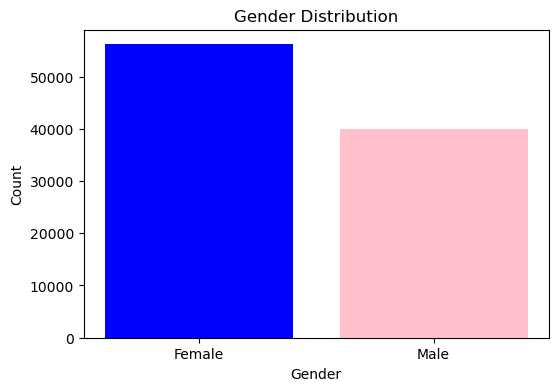

                                  -------------------------
le cont des valeur : 
gender
Female    56161
Male      39967
Name: count, dtype: int64


In [24]:
print()
print('              ############################## visualisation de varible gender apres la suppression des outliers ##############################')
print()

gender_counts = data['gender'].value_counts()
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

print('                                  -------------------------')
print('le cont des valeur : ')
print(gender_counts)

### age 

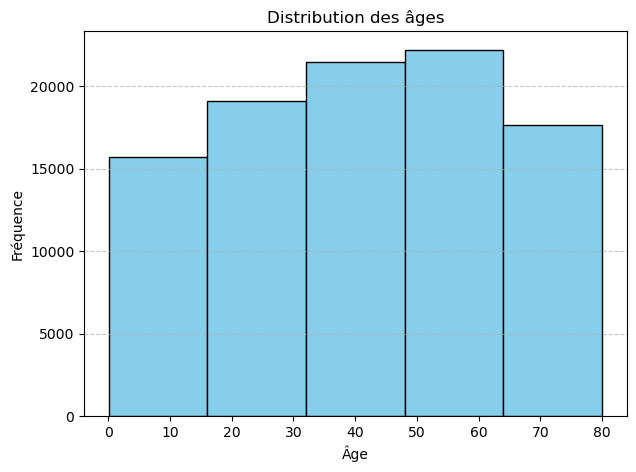

                                  -------------------------
le min est : 0
le max est : 80



In [6]:
# Tracer l'histogramme
plt.figure(figsize=(7,5))
plt.hist(data['age'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.title("Distribution des âges")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#changer le types de des valeur a int
data['age'] = pd.to_numeric(data['age'], errors='coerce') 
data['age'] = data['age'].astype(-int)

print('                                  -------------------------')
print(f'le min est : {data['age'].min()}')
print(f'le max est : {data['age'].max()}')
print()

### hypertention 


              ############################## visualisation de varible hypertention ##############################



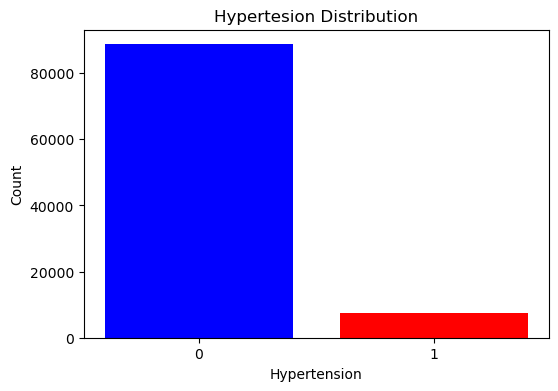

                                  -------------------------
le cont des valeur : 
hypertension
0    88667
1     7461
Name: count, dtype: int64


In [26]:

print()
print('              ############################## visualisation de varible hypertention ##############################')
print()

hypertension_counts = data['hypertension'].value_counts()
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(hypertension_counts.index, hypertension_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['0', '1'])
plt.xlabel("Hypertension")
plt.ylabel("Count")
plt.title("Hypertesion Distribution")
plt.show()

print('                                  -------------------------')
print('le cont des valeur : ')
print(hypertension_counts)

### Heart Disease


              ############################## visualisation de varible heart_disease ##############################



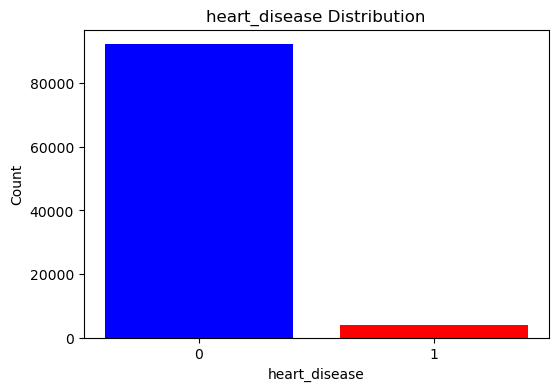

                                  -------------------------
le cont des valeur : 
heart_disease
0    92205
1     3923
Name: count, dtype: int64


In [27]:

print()
print('              ############################## visualisation de varible heart_disease ##############################')
print()

heart_disease_counts = data['heart_disease'].value_counts()
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(heart_disease_counts.index, heart_disease_counts.values, color=['blue', 'red'])
plt.xticks([0, 1], ['0', '1'])
plt.xlabel("heart_disease")
plt.ylabel("Count")
plt.title("heart_disease Distribution")
plt.show()

print('                                  -------------------------')
print('le cont des valeur : ')
print(heart_disease_counts)

### Smoking history


              ############################## visualisation de varible smoking_history ##############################



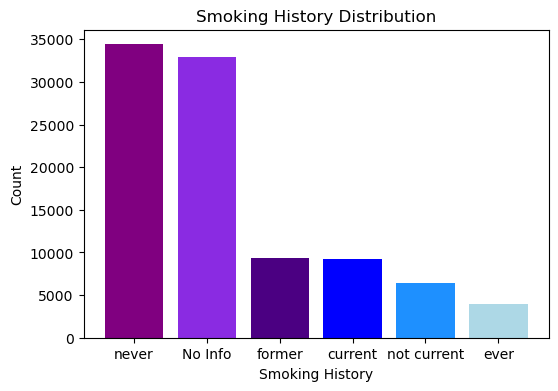

                                  -------------------------
le cont des valeur : 
smoking_history
never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: count, dtype: int64


In [28]:
print()
print('              ############################## visualisation de varible smoking_history ##############################')
print()

smoking_history_counts = data['smoking_history'].value_counts()
# Plot the bar chart
plt.figure(figsize=(6, 4))
plt.bar(smoking_history_counts.index, smoking_history_counts.values, color=['Purple','#8A2BE2', 'Indigo','Blue','#1E90FF','#ADD8E6'])
plt.xlabel("Smoking History")
plt.ylabel("Count")
plt.title("Smoking History Distribution")
plt.show()

print('                                  -------------------------')
print('le cont des valeur : ')
print(smoking_history_counts)

### BMI

                                  -------------------------
le min est : 10
le max est : 95
le mode est : 0    27
Name: bmi, dtype: int32



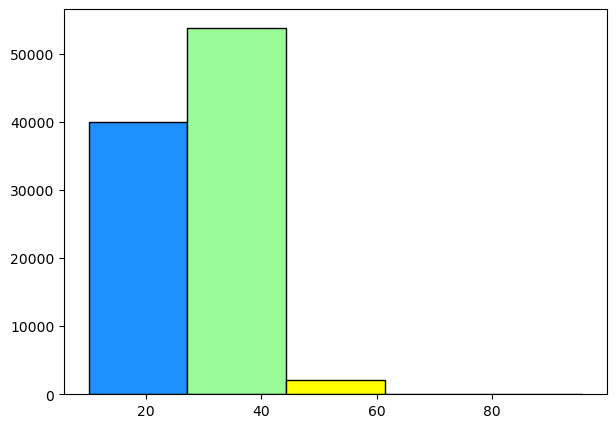

In [7]:
# Créer un histogramme de BMI
plt.figure(figsize=(7, 5))
n, bins, patches = plt.hist(data['bmi'], bins=5, edgecolor='black')

# Attribuer une couleur différente à chaque barre
colors = ['#1E90FF', '#98FB98', 'yellow', '#FFB84D', 'red']
for i in range(len(patches)):
    patches[i].set_facecolor(colors[i])
#changer le types de des valeur a int
data['bmi'] = pd.to_numeric(data['bmi'], errors='coerce') 
data['bmi'] = data['bmi'].astype(int)

print('                                  -------------------------')
print(f'le min est : {data['bmi'].min()}')
print(f'le max est : {data['bmi'].max()}')
print(f'le mode est : {data['bmi'].mode()}')
print()

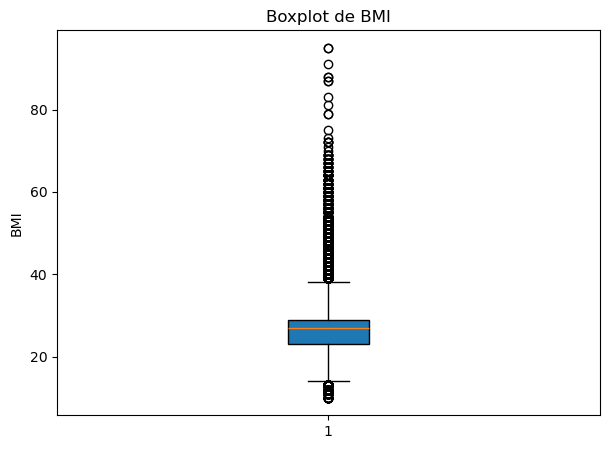

In [8]:
plt.figure(figsize=(7, 5))
plt.boxplot(data['bmi'], vert=True, patch_artist=True)
plt.ylabel("BMI")
plt.title("Boxplot de BMI")
plt.show()

#### supression des outliers pour le BMI

In [9]:
# Calcul des quartiles
Q1 = data['bmi'].quantile(0.25)
Q3 = data['bmi'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrer les données pour supprimer les outliers
data = data[(data['bmi'] >= lower_limit) & (data['bmi'] <= upper_limit)]



              ############################## boxplot de varible bmi apres la supression des outliers ##############################



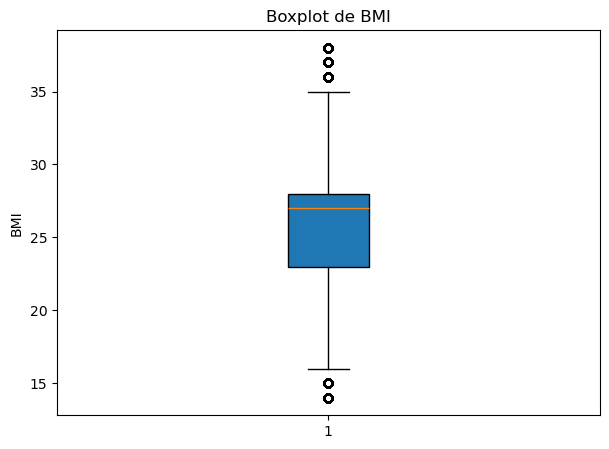

In [32]:
print()
print('              ############################## boxplot de varible bmi apres la supression des outliers ##############################')
print()


plt.figure(figsize=(7, 5))
plt.boxplot(data['bmi'], vert=True, patch_artist=True)
plt.ylabel("BMI")
plt.title("Boxplot de BMI")
plt.show()

### HbA1c_level

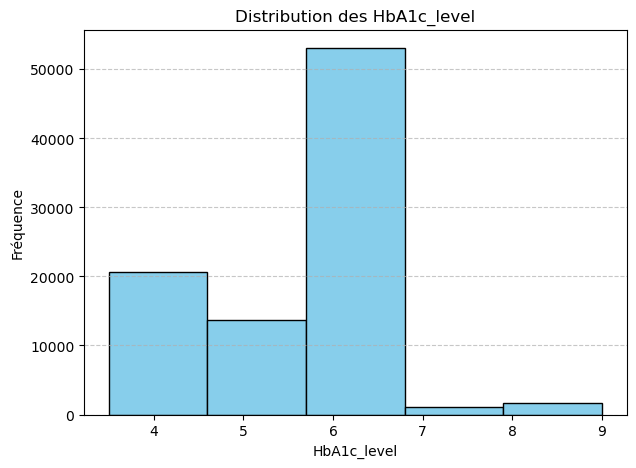

                                  -------------------------
le min est : 3.5
le max est : 9.0
le mode est : 0    6.6
Name: HbA1c_level, dtype: float64



In [33]:
# Tracer l'histogramme
plt.figure(figsize=(7,5))
plt.hist(data['HbA1c_level'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel("HbA1c_level")
plt.ylabel("Fréquence")
plt.title("Distribution des HbA1c_level")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {data['HbA1c_level'].min()}')
print(f'le max est : {data['HbA1c_level'].max()}')
print(f'le mode est : {data['HbA1c_level'].mode()}')
print()

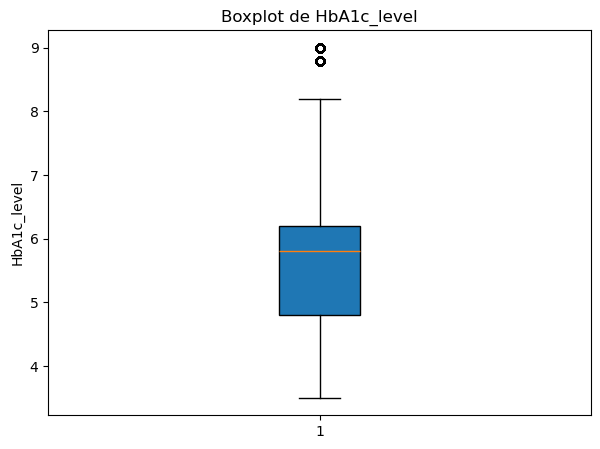

In [34]:
plt.figure(figsize=(7, 5))
plt.boxplot(data['HbA1c_level'], vert=True, patch_artist=True)
plt.ylabel("HbA1c_level")
plt.title("Boxplot de HbA1c_level")
plt.show()

### blood_glucose_level

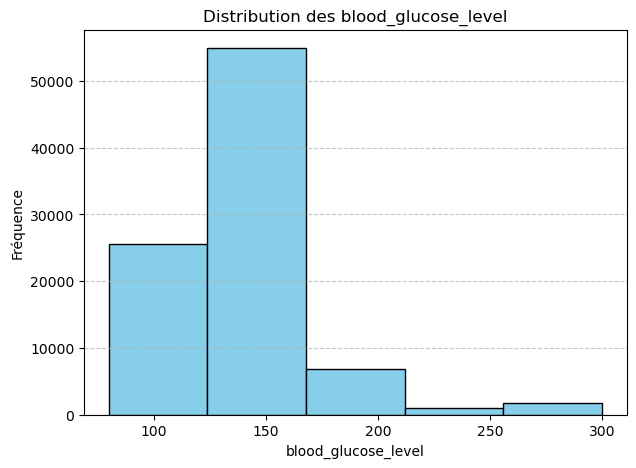

                                  -------------------------
le min est : 80
le max est : 300
le mode est : 0    159
Name: blood_glucose_level, dtype: int64



In [35]:
# Tracer l'histogramme
plt.figure(figsize=(7,5))
plt.hist(data['blood_glucose_level'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel("blood_glucose_level")
plt.ylabel("Fréquence")
plt.title("Distribution des blood_glucose_level")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print('                                  -------------------------')
print(f'le min est : {data['blood_glucose_level'].min()}')
print(f'le max est : {data['blood_glucose_level'].max()}')
print(f'le mode est : {data['blood_glucose_level'].mode()}')

print()

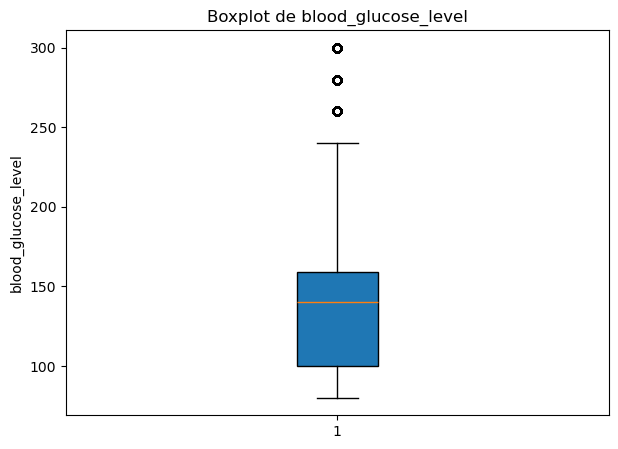

In [36]:
plt.figure(figsize=(7, 5))
plt.boxplot(data['blood_glucose_level'], vert=True, patch_artist=True)
plt.ylabel("blood_glucose_level")
plt.title("Boxplot de blood_glucose_level")
plt.show()

#### supression des outliers pour le blood_glucose_level

In [10]:
# Calcul des quartiles
Q1 = data['blood_glucose_level'].quantile(0.25)
Q3 = data['blood_glucose_level'].quantile(0.75)
IQR = Q3 - Q1

# Définir les limites
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrer les données pour supprimer les outliers
data = data[(data['blood_glucose_level'] >= lower_limit) & (data['blood_glucose_level'] <= upper_limit)]



              ############################## boxplot de varible blood_glucose_level apres la supression des outliers ##############################



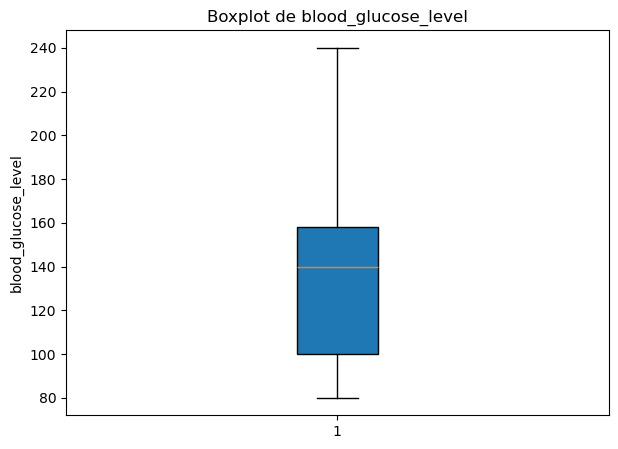

In [38]:
print()
print('              ############################## boxplot de varible blood_glucose_level apres la supression des outliers ##############################')
print()


plt.figure(figsize=(7, 5))
plt.boxplot(data['blood_glucose_level'], vert=True, patch_artist=True)
plt.ylabel("blood_glucose_level")
plt.title("Boxplot de blood_glucose_level")
plt.show()

## 7. Destribution des variable target

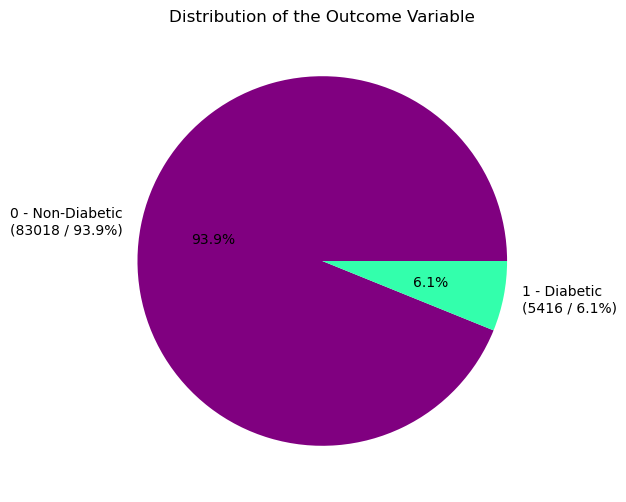

In [39]:
# Calculate the counts of each outcome
outcome_counts = data['diabetes'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'0 - Non-Diabetic\n({outcome_counts[0]} / {percentages[0]:.1f}%)',
          f'1 - Diabetic\n({outcome_counts[1]} / {percentages[1]:.1f}%)']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['purple', '#33ffac'])
plt.title('Distribution of the Outcome Variable')
plt.show()

#### balancer le variable target 

In [22]:
data0 = data[data['diabetes'] == 0]
data1 = data[data['diabetes'] == 1]
data0 = data0.iloc[:data1.shape[0]]

data1 = data1.reset_index(drop=True)
data0 = data0.reset_index(drop=True)
data = pd.concat([data0,data1]).sort_index(kind='merge').reset_index(drop=True)


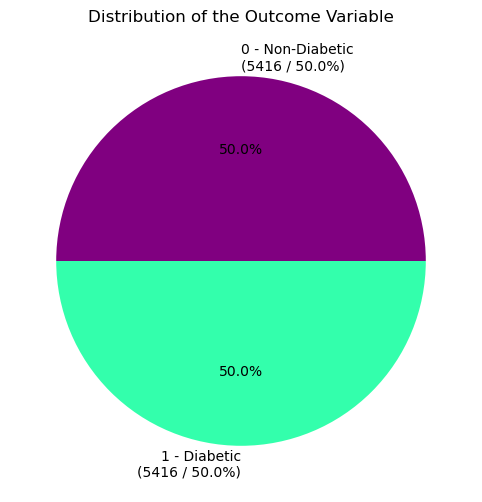

In [41]:
# Calculate the counts of each outcome
outcome_counts = data['diabetes'].value_counts()

# Calculate the total number of patients
total_patients = outcome_counts.sum()

# Calculate the percentages
percentages = outcome_counts / total_patients * 100

# Create labels with both quantity and percentage
labels = [f'0 - Non-Diabetic\n({outcome_counts[0]} / {percentages[0]:.1f}%)',
          f'1 - Diabetic\n({outcome_counts[1]} / {percentages[1]:.1f}%)']

# Plot the pie chart with labels and percentages
plt.figure(figsize=(8, 6))
plt.pie(outcome_counts, labels=labels, autopct='%1.1f%%', colors=['purple', '#33ffac'])
plt.title('Distribution of the Outcome Variable')
plt.show()

## 8. Encodage

### gender

In [11]:
#encodage du colonne gender 
data.loc[data['gender'] == 'Female','gender'] = 1
data.loc[data['gender'] == 'Male','gender'] = 0

data = data[data['gender'].isin([0,1])]

In [12]:
print()
print("              ############################## le variable gender apree l\'encodage ##############################")
print()

data['gender'] = pd.to_numeric(data['gender'], errors='coerce') 
print(f'le gender est de type {data['gender'].dtypes}')
print('                                  -------------------------')
print(data['gender'].value_counts())
print()


              ############################## le variable gender apree l'encodage ##############################

le gender est de type int64
                                  -------------------------
gender
1    51221
0    37213
Name: count, dtype: int64



### smoking_history

In [13]:
data.loc[data['smoking_history'] == 'never','smoking_history'] = 0
data.loc[data['smoking_history'] == 'No Info','smoking_history'] = 0
data.loc[data['smoking_history'] == 'current','smoking_history'] = 1

In [14]:
print()
print("              ############################## le variable smoking_history apree l\'encodage ##############################")
print()

data['smoking_history'] = pd.to_numeric(data['smoking_history'], errors='coerce') 
print(f'le gender est de type {data['smoking_history'].dtypes}')
print('                                  -------------------------')
print(data['smoking_history'].value_counts())
print()


              ############################## le variable smoking_history apree l'encodage ##############################

le gender est de type float64
                                  -------------------------
smoking_history
0.0    62416
1.0     8400
Name: count, dtype: int64



## 9. Standarisation des colonnes

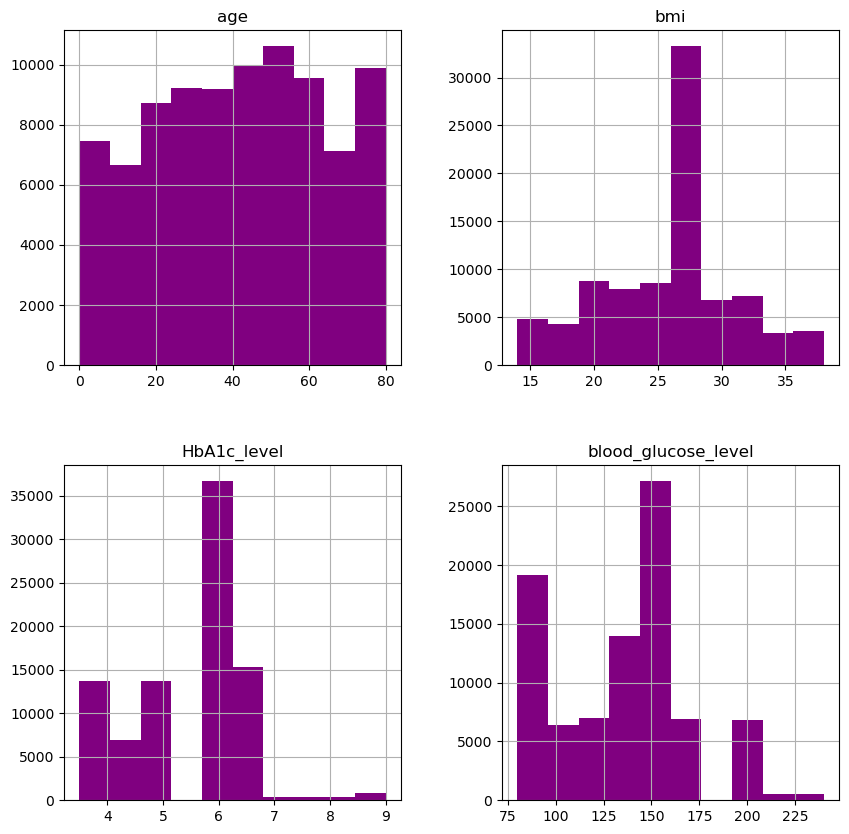

In [15]:
columns_to_normalize = ['age', 'bmi','HbA1c_level','blood_glucose_level']
# Display histograms for the entire dataset
data[columns_to_normalize].hist(figsize=(10,10),color='purple')  

# Show the plot
plt.show() 

In [16]:
#Standardisez 
for col in columns_to_normalize:
    data[col] = (data[col] - data[col].mean()) / data[col].std()


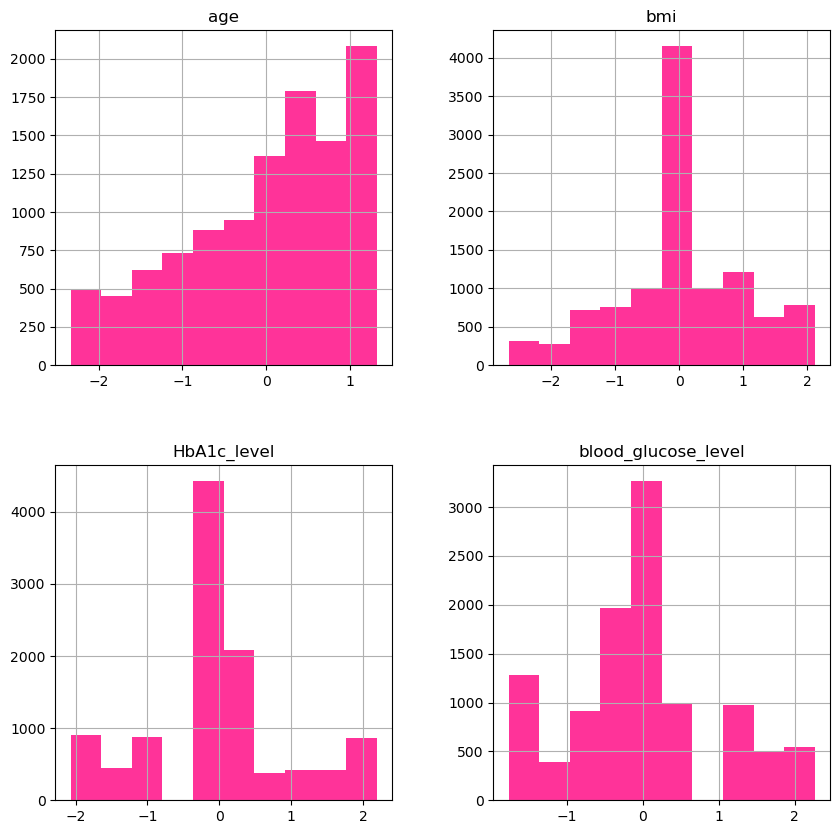

In [48]:
# Display histograms for the entire dataset
data[columns_to_normalize].hist(figsize=(10,10),color='#ff3399')  

# Show the plot
plt.show() 

 ## Visualisation de donnees

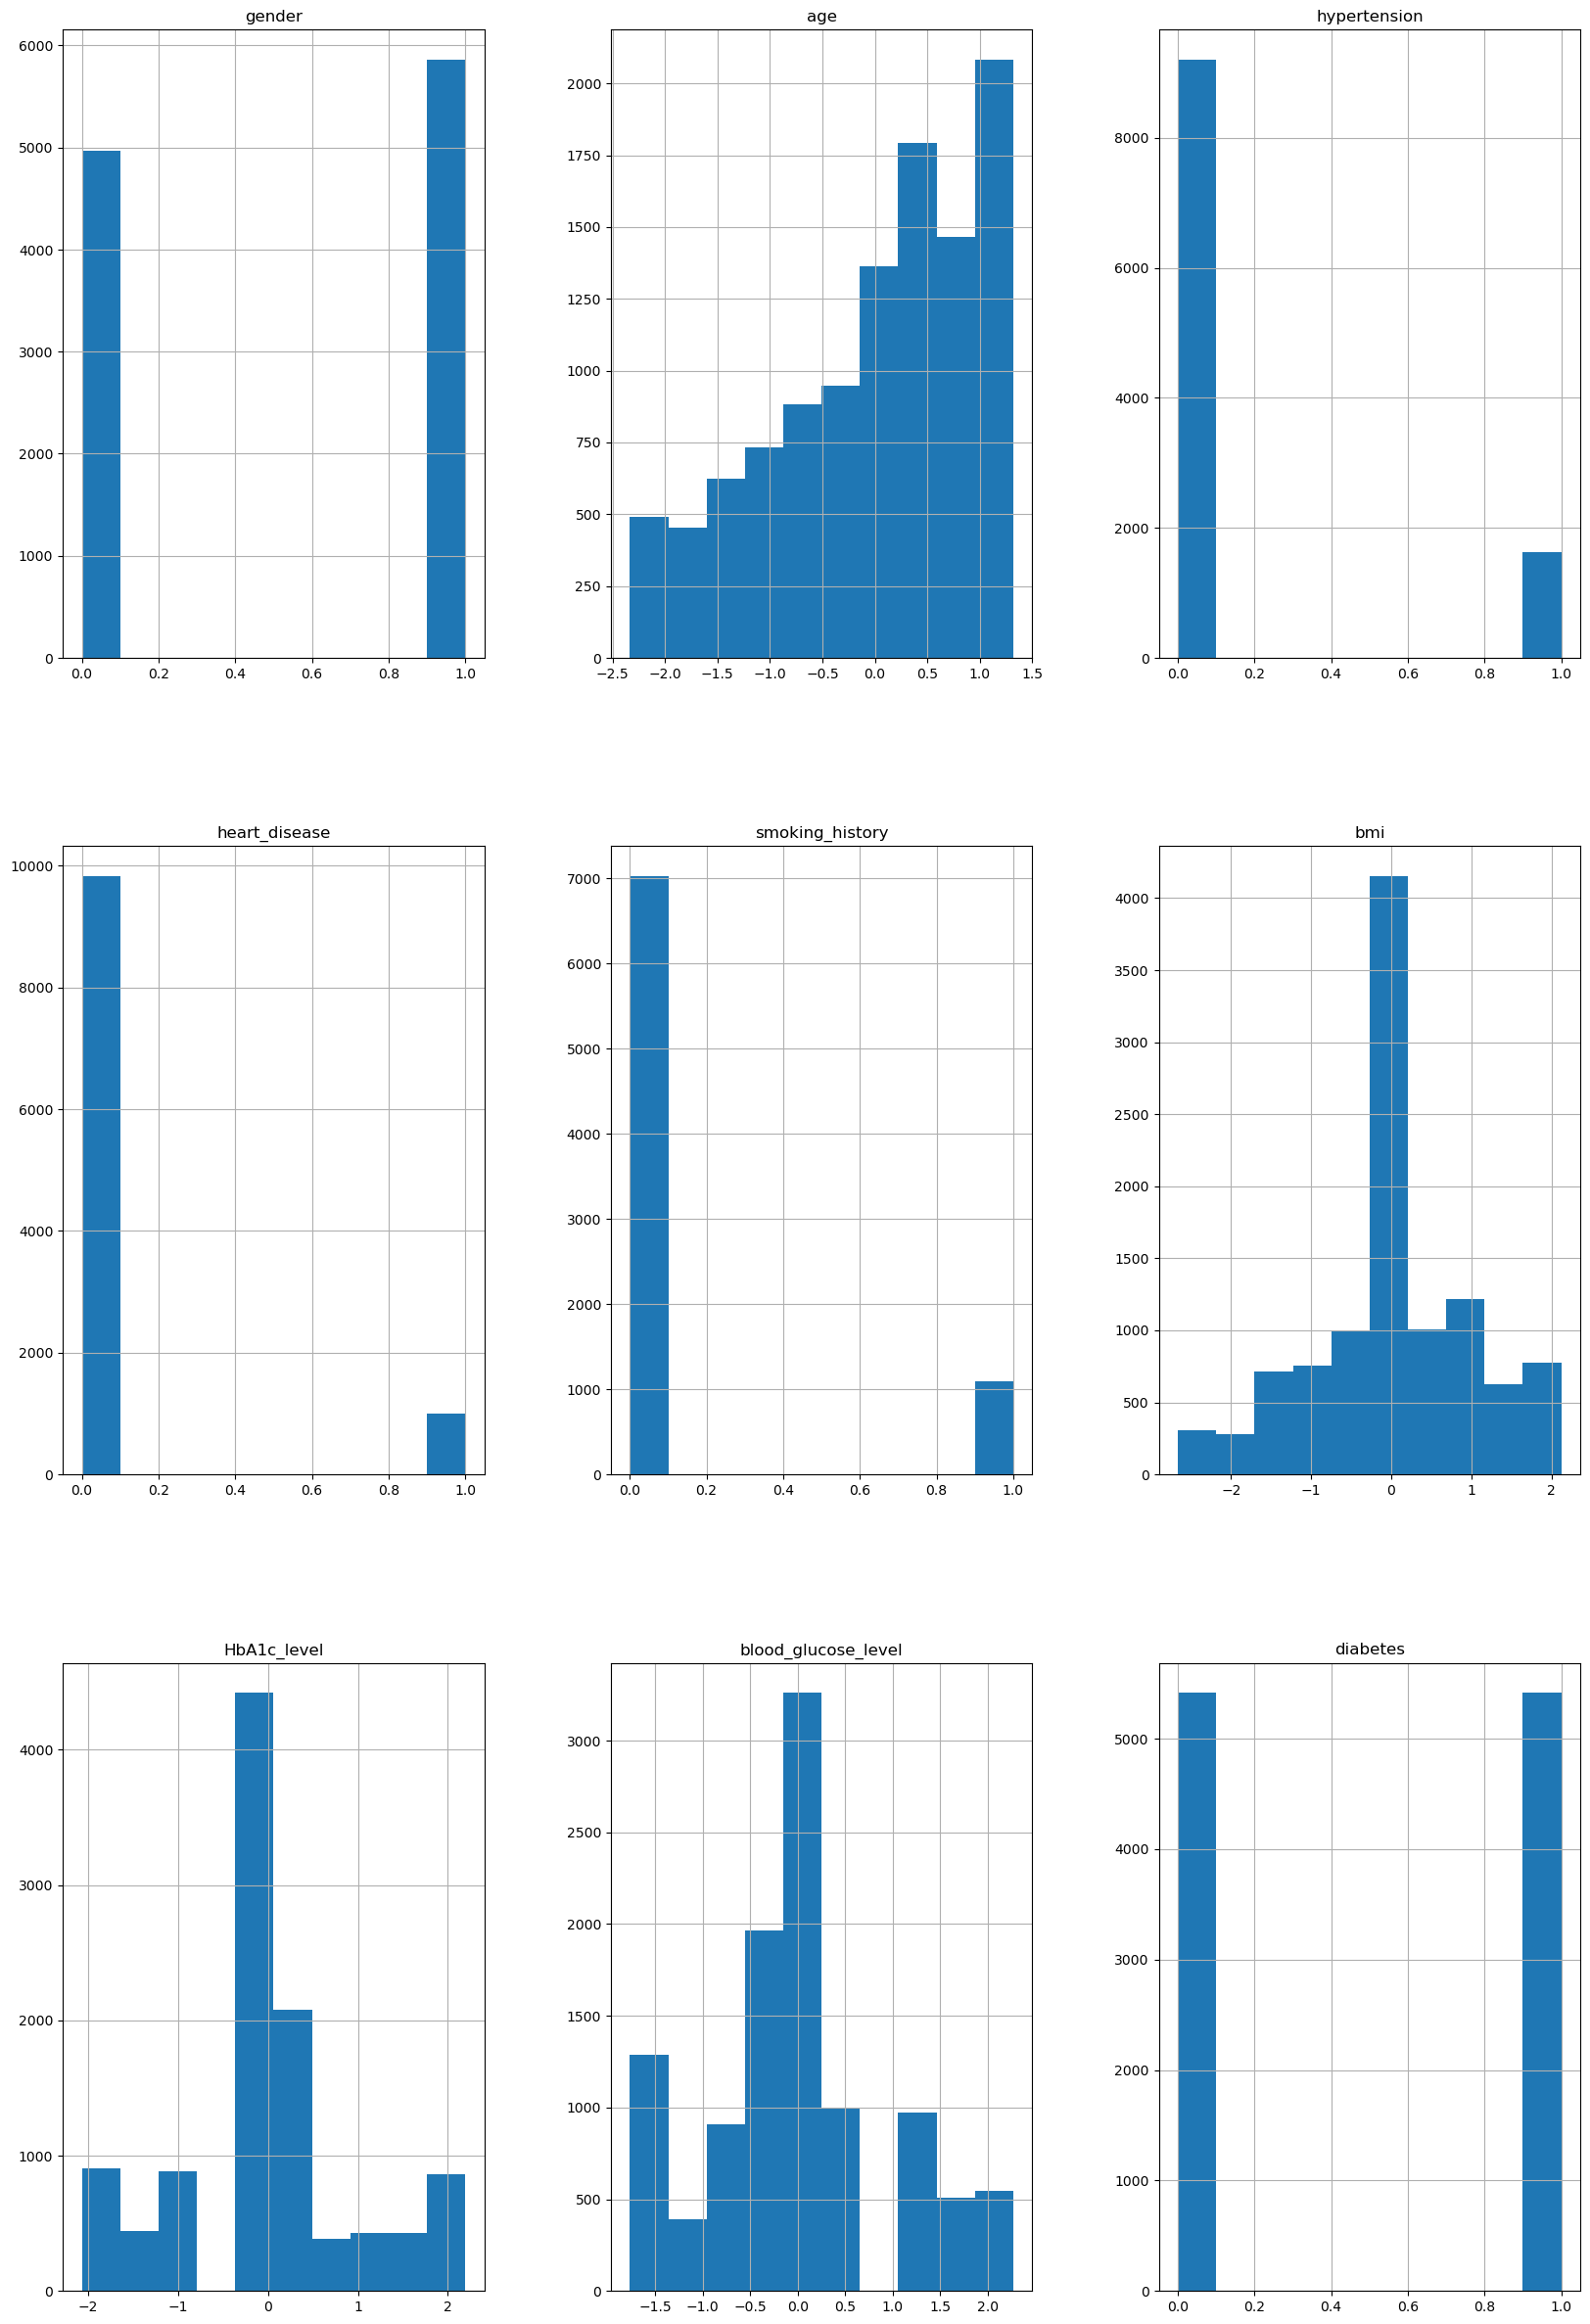

In [49]:
# Importing the necessary library for plotting
import matplotlib.pyplot as plt

# Display histograms for the entire dataset
data.hist(figsize=(20,30))  

# Show the plot
plt.show() 

<Axes: ylabel='count'>

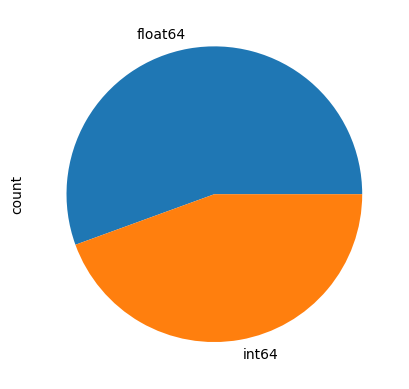

In [50]:
#conter les difference type de donner
data.dtypes.value_counts().plot.pie()


In [17]:
data = data.dropna()

## 10. Relation entre le variable target et les autre variables

### une heatmap pour visualiser la corrélation entre les variables numériques.

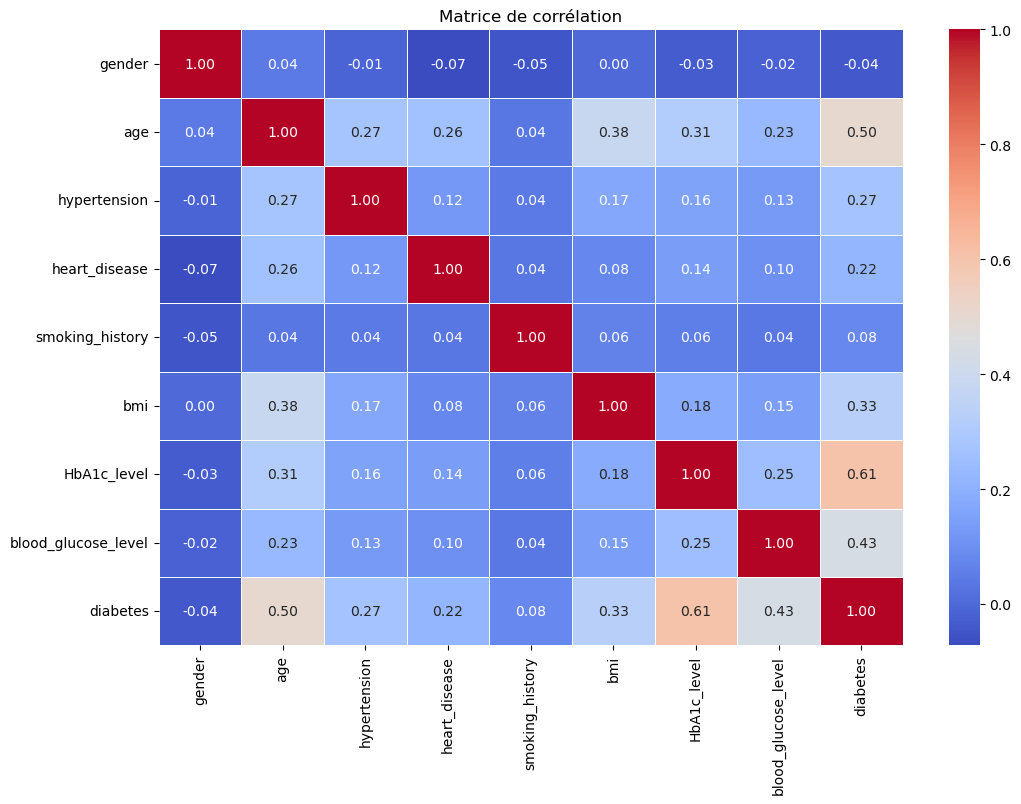

In [52]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()
# Visualisation avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


#### Boxplots pour analyser la cible par rapport aux autres variables

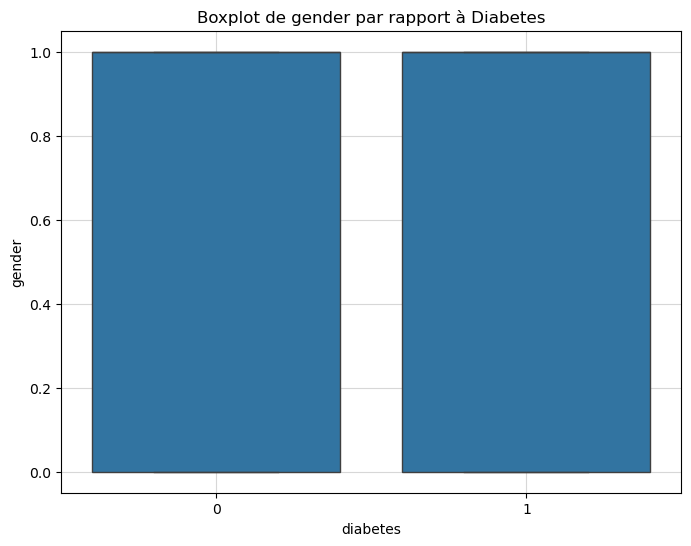

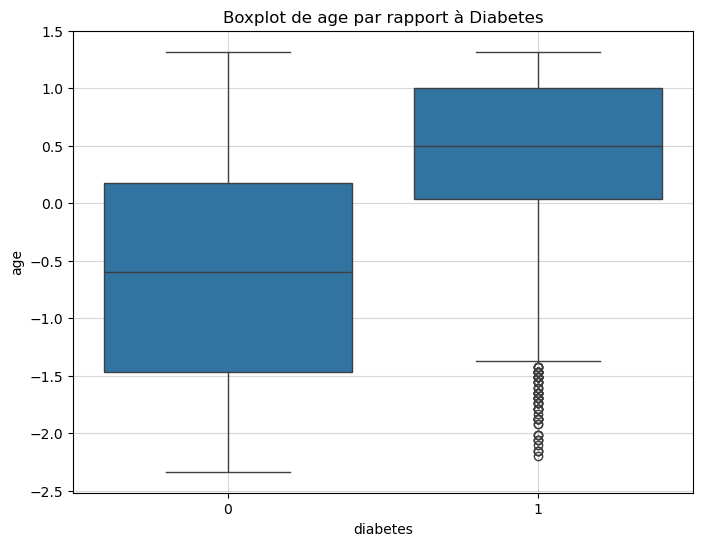

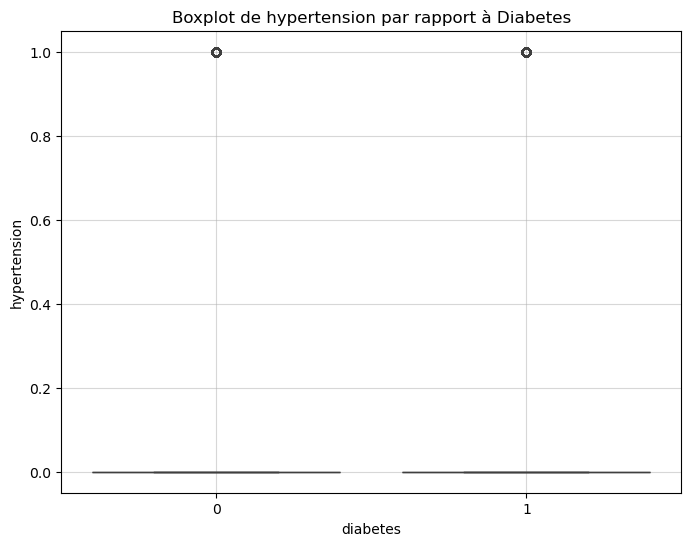

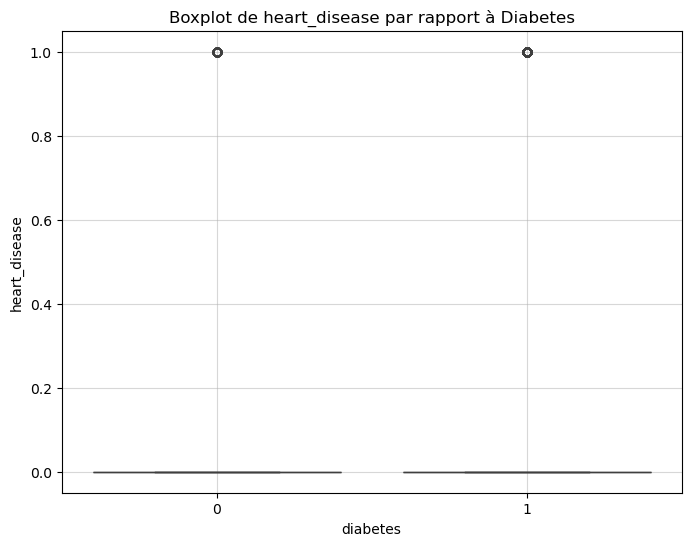

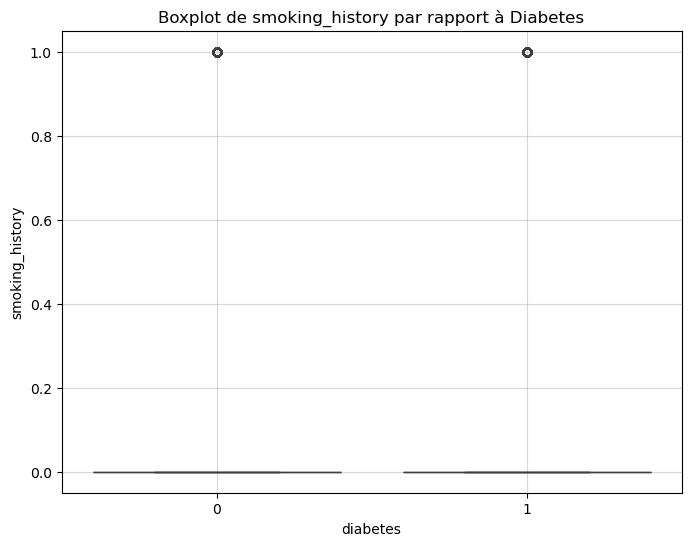

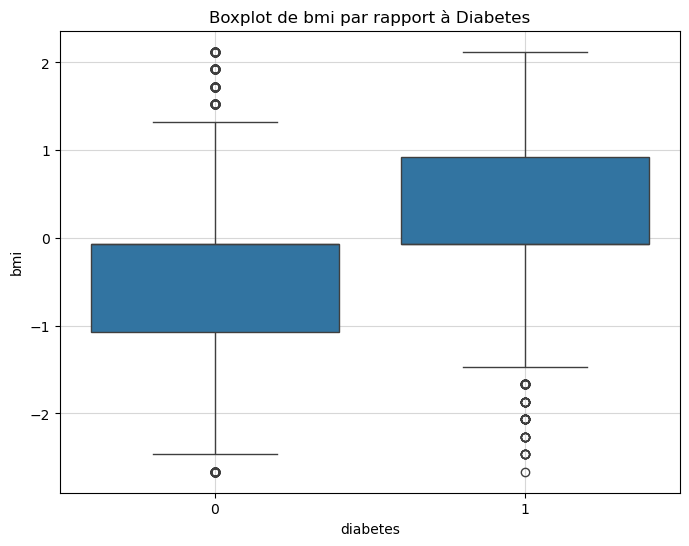

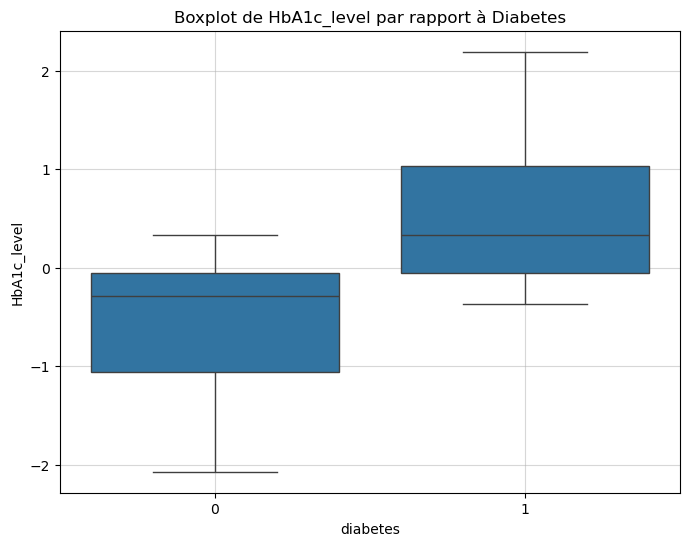

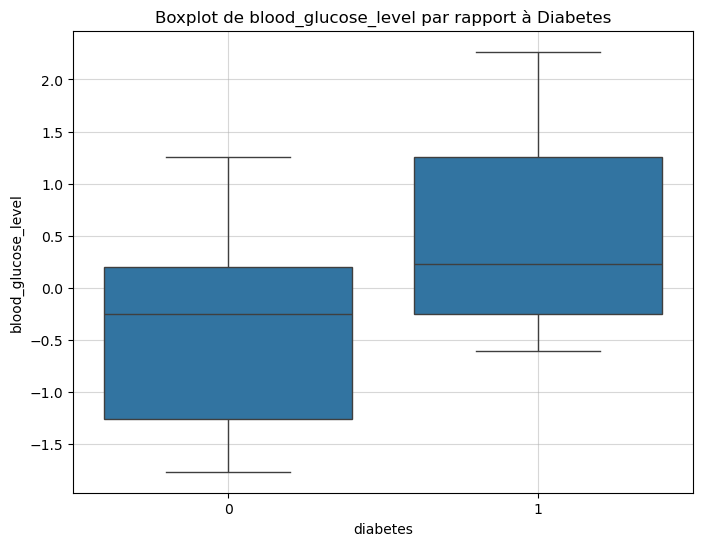

In [53]:
# Variables numériques
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Création des boxplots
for column in numeric_columns:
    if column != 'diabetes':  # Exclure la variable cible elle-même
        plt.figure(figsize=(8, 6))
        sns.boxplot(x='diabetes', y=column, data=data)
        plt.title(f"Boxplot de {column} par rapport à Diabetes")
        plt.grid(alpha=0.5)
        plt.show()


#### KDE (Kernel Density Estimation): Exemple comme "age" et "diabetes". Le KDE vous permet de visualiser la densité de l'âge pour les personnes atteintes de diabète par rapport à celles qui ne l'ont pas. Cela pourrait vous aider à identifier si l'âge a une influence sur la probabilité d'avoir du diabète.

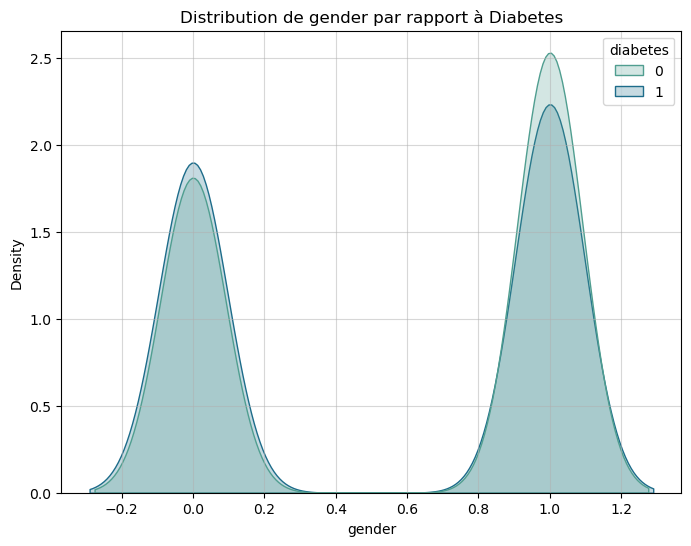

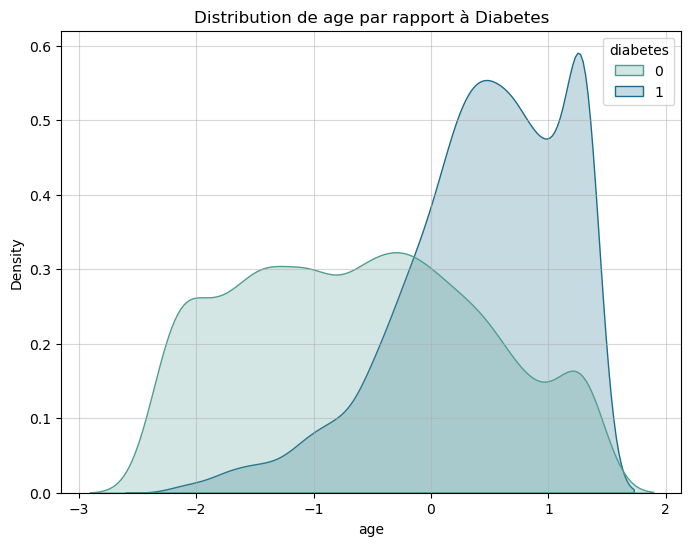

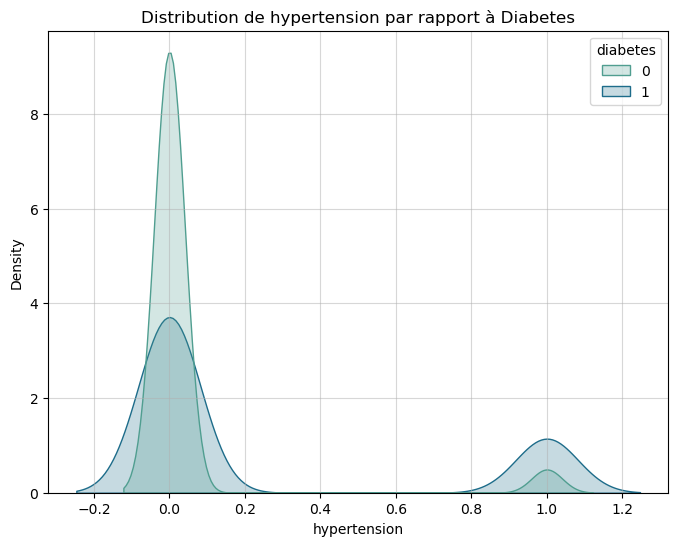

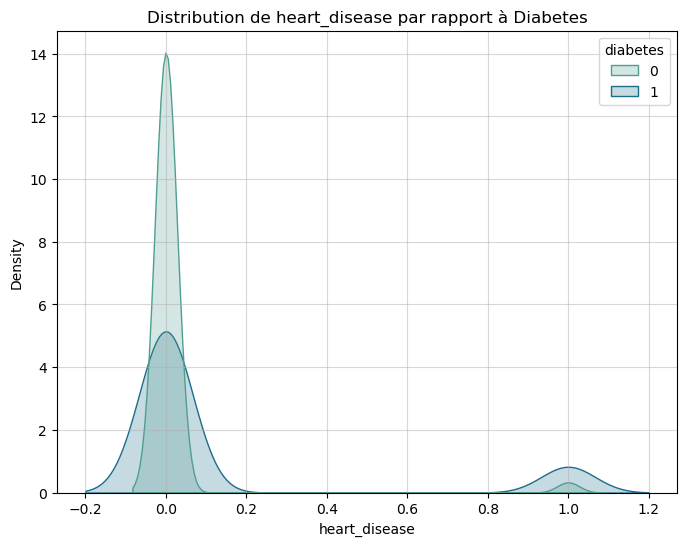

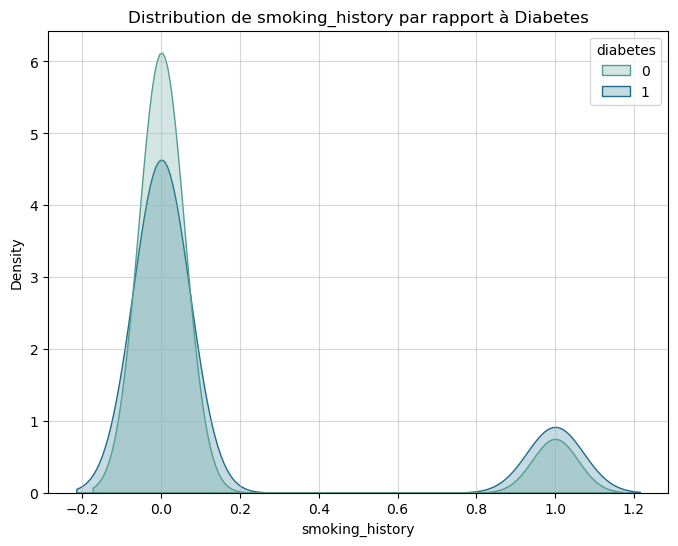

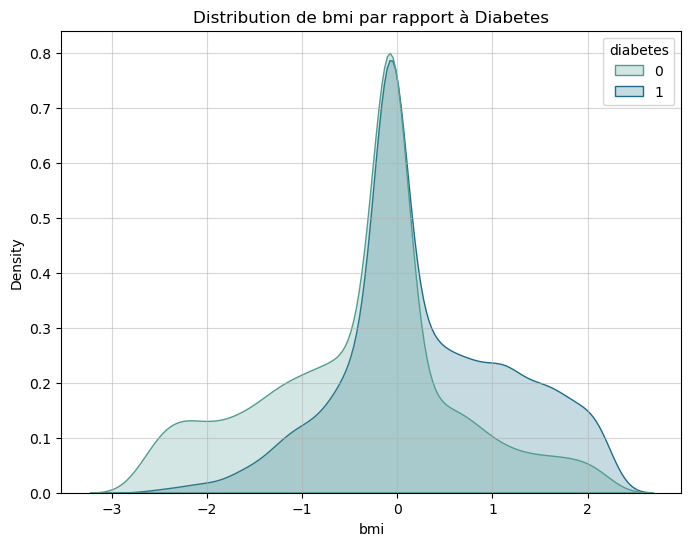

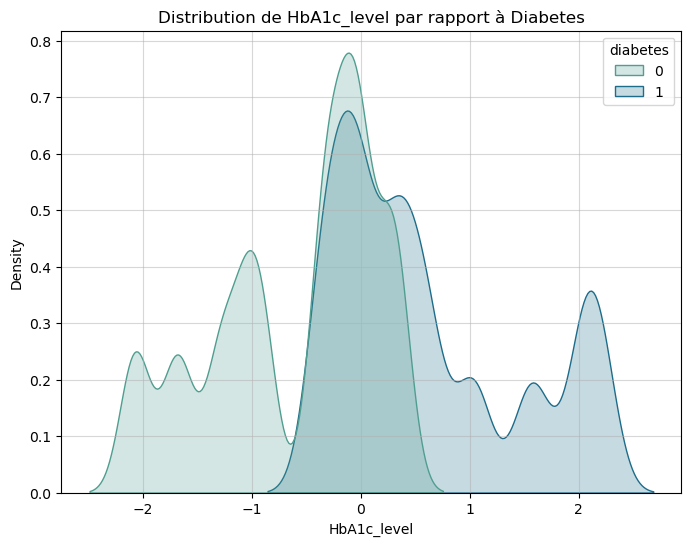

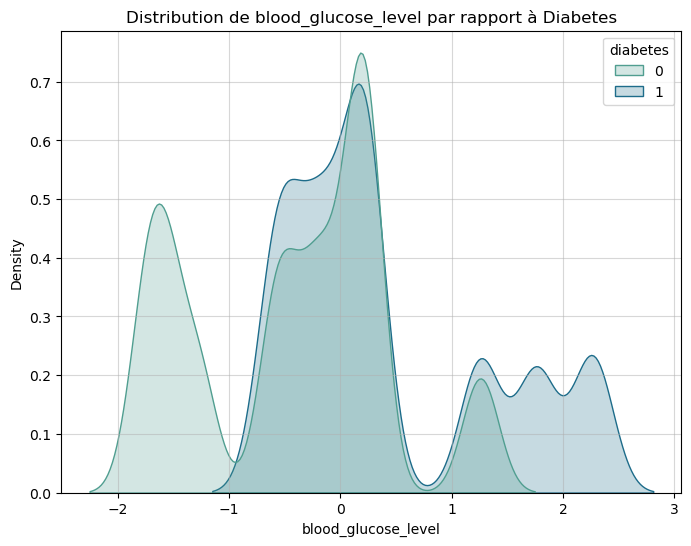

In [54]:
# Création des KDE plots
for column in numeric_columns:
    if column != 'diabetes':  # Exclure la variable cible elle-même
        plt.figure(figsize=(8, 6))
        sns.kdeplot(data=data, x=column, hue='diabetes', fill=True, common_norm=False, palette="crest")
        plt.title(f"Distribution de {column} par rapport à Diabetes")
        plt.grid(alpha=0.5)
        plt.show()

## 11. Logistic regression

In [23]:
x = data.drop(columns=['diabetes']) 
y = data['diabetes'] 

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)


In [25]:
lr=LogisticRegression()

lr.fit(x_train,y_train)


LogisticRegression()

### Mesures de performance

In [26]:
pred= lr.predict(x_test)
print("Logistic Regression:")
print(f"Accuracy: {round(accuracy_score(pred, y_test), 4)}")
print(f"Recall: {round(recall_score(pred, y_test), 4)}")
print(f"Precision: {round(precision_score(pred, y_test), 4)}")
print(f"F1: {round(f1_score(pred, y_test), 4)}")
print(f"AUC: {round(roc_auc_score(pred, y_test), 4)}")

Logistic Regression:
Accuracy: 0.8731


NameError: name 'recall_score' is not defined

## 12. Visualise the model performence


In [ ]:
from sklearn.metrics import roc_curve, auc

# Get probabilities
y_probs = lr.predict_proba(x_test)[:, 1]  # Get probability of class 1

# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, color='purple', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [ ]:
feature_importance = pd.Series(np.abs(lr.coef_[0]), index=x_train.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar', color='purple')
plt.title('Feature Importance in Logistic Regression')
plt.ylabel('Coefficient Magnitude')
plt.xlabel('Features')
plt.show()


## 13. Sauvgarder le model 

In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(lr, "modele_prediction_diabetes.pkl")